# Лабораторна робота 1

**Мета:** Підготувати оточення для виконання подальших лабораторних робіт з дисципліни «Вступ до штучного інтелекту».  

**Завдання:**
1. Отримати базові навички роботи в оточенні Jupyter Notebook.
2. Розробити граф-дорогу, на основі якого будуть виконані подальші лабораторні роботи.

## Імпорт бібліотек

У цій комірці підключаються необхідні бібліотеки для роботи з графами та візуалізації.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

## Створення класу RoadGraph

У цій комірці реалізується клас RoadGraph, який відповідає за генерацію дорожньої сітки.


In [2]:
class RoadGraph:
    def __init__(self, size: int = 25, remove_edges: int = 5):
        self.size = size
        self.grid_size = int(size ** 0.5)
        if self.grid_size ** 2 != size:
            raise ValueError("Кількість вершин повинна утворювати квадратну сітку")
        self.remove_edges = remove_edges
        self.graph = nx.Graph()
        self._generate_graph()
        self._remove_edges()

    def _generate_graph(self):
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                node = i * self.grid_size + j
                self.graph.add_node(node, pos=(j, -i))
                if j < self.grid_size - 1:
                    self.graph.add_edge(node, node + 1)
                if i < self.grid_size - 1:
                    self.graph.add_edge(node, node + self.grid_size)

    def _remove_edges(self):
        removed = 0
        while removed < self.remove_edges:
            bridges = set(nx.bridges(self.graph))
            candidates = [i for i in self.graph.edges() if i not in bridges]
            if not candidates:
                break
            edg = random.choice(candidates)
            self.graph.remove_edge(*edg)
            removed += 1

    def draw(self):
        pos = nx.get_node_attributes(self.graph, 'pos')
        plt.figure(figsize=(6, 6))
        nx.draw(self.graph, pos, with_labels=False, node_size=500, node_color="white", edgecolors="black", linewidths=2)


## Створення об'єкта графа та візуалізація

У цій комірці створюється об'єкт класу RoadGraph та виводиться його графічне представлення.


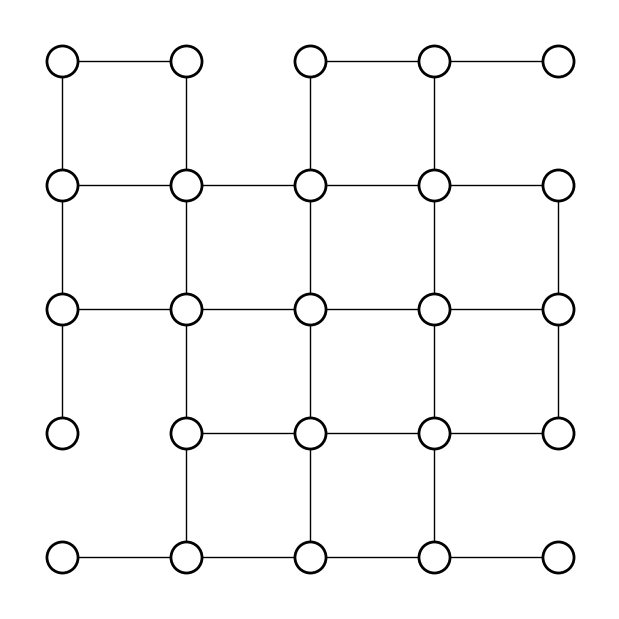

In [3]:
road_graph = RoadGraph(size=25, remove_edges=5)

road_graph.draw()


<div style="text-align: right;">

  **Виконав:** Токарюк Станіслав Борисович 
   
  **Перевірив:** Трочун Євгеній Володимирович  
</div>